# 用 scikit-learn 学习 K-Means 聚类

参考资料：

刘建平的文章：用scikit-learn学习K-Means聚类
https://www.cnblogs.com/pinard/p/6169370.html

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


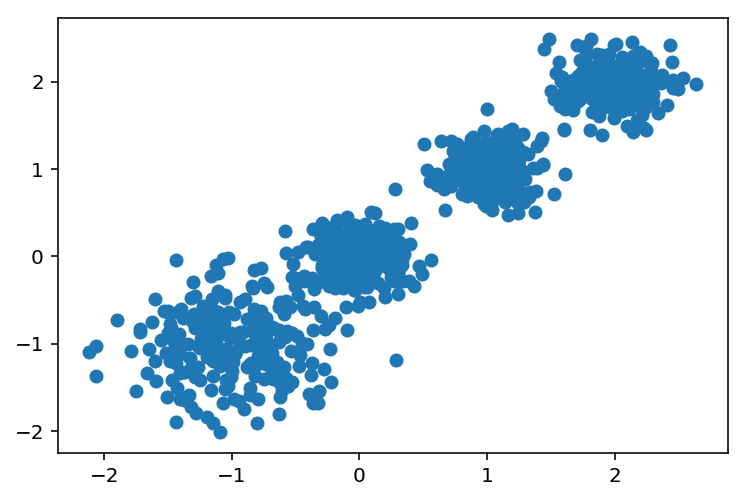

In [2]:
from sklearn.datasets.samples_generator import make_blobs

# X 为样本特征，Y 为样本簇类别，
# 共 1000 个样本，每个样本 2 个特征，共 4 个簇，
# 簇中心在 [-1,-1], [0,0],[1,1], [2,2]， 
# 簇方差分别为[0.4, 0.2, 0.2]
X, y = make_blobs(
    n_samples=1000,
    n_features=2,
    centers=[[-1, -1], [0, 0], [1, 1], [2, 2]],
    cluster_std=[0.4, 0.2, 0.2, 0.2],
    random_state=9)
plt.scatter(X[:, 0], X[:, 1], marker='o')
plt.show()

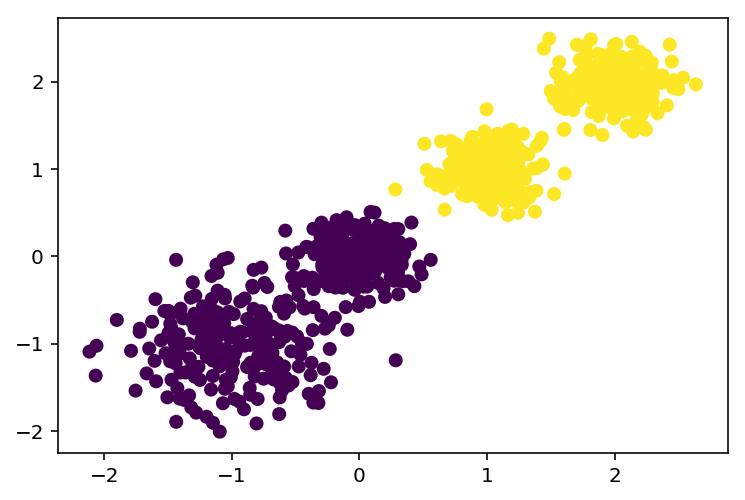

In [3]:
from sklearn.cluster import KMeans

y_pred = KMeans(n_clusters=2, random_state=9).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

使用 Calinski-Harabasz Index 作为评估指标。

In [4]:
from sklearn import metrics
metrics.calinski_harabaz_score(X, y_pred)  

3116.1706763322227

k = 3 的时候。

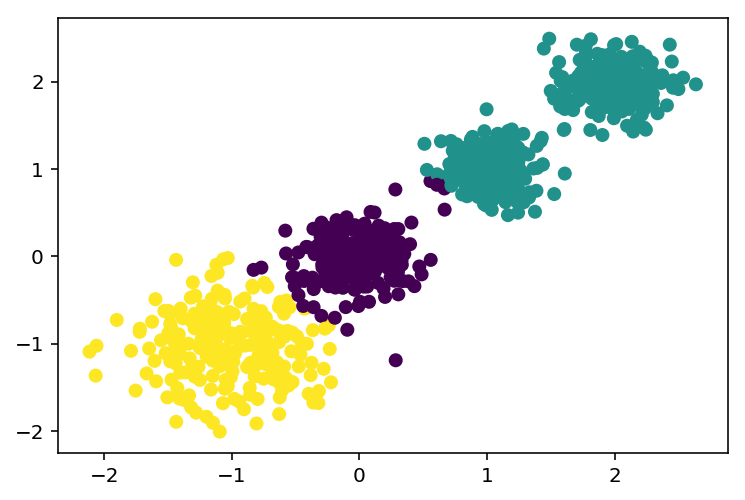

In [7]:
from sklearn.cluster import KMeans

y_pred = KMeans(n_clusters=3, random_state=9).fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

看看评估指标。

In [8]:
metrics.calinski_harabaz_score(X, y_pred)  

2931.625030199556

可见此时 k=3 的聚类分数比 k=2 还差。

k=4 的时候：

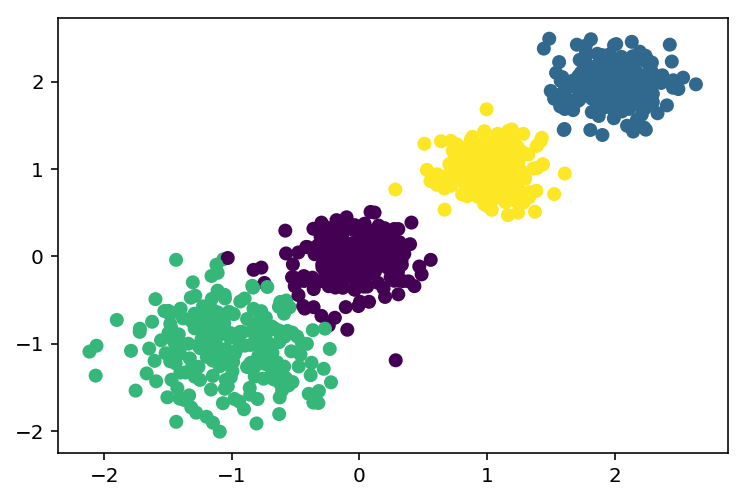

In [9]:
from sklearn.cluster import KMeans

y_pred = KMeans(n_clusters=4, random_state=9).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

In [10]:
metrics.calinski_harabaz_score(X, y_pred)  

5924.050613480169

数值越高越好。

可见 k=4 的聚类分数比 k=2 和 k=3 都要高，这也符合我们的预期，我们的随机数据集也就是 4 个簇。当特征维度大于 2 ，我们无法直接可视化聚类效果来肉眼观察时，用 Calinski-Harabaz Index 评估是一个很实用的方法。

## MiniBatchKMeans

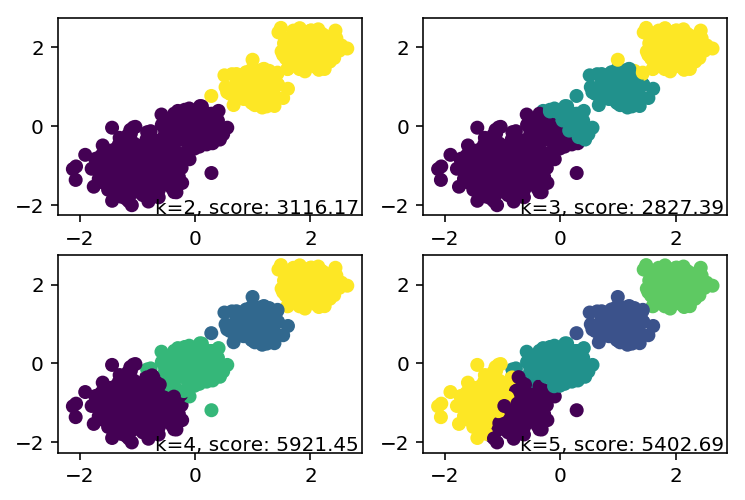

In [12]:
from sklearn.cluster import MiniBatchKMeans

for index, k in enumerate((2, 3, 4, 5)):
    plt.subplot(2, 2, index + 1)
    y_pred = MiniBatchKMeans(
        n_clusters=k, batch_size=200, random_state=9).fit_predict(X)
    score = metrics.calinski_harabaz_score(X, y_pred)
    plt.scatter(X[:, 0], X[:, 1], c=y_pred)
    plt.text(
        .99,
        .01, ('k=%d, score: %.2f' % (k, score)),
        transform=plt.gca().transAxes,
        size=10,
        horizontalalignment='right')
plt.show()

可见使用 MiniBatchKMeans 的聚类效果也不错，当然由于使用 Mini Batch 的原因，同样是 k=4 最优，KMeans 类的 Calinski-Harabasz Index 分数为 5924.05，而 MiniBatchKMeans 的分数稍微低一些，为 5921.45。这个差异损耗并不大。